# All Sites- Analysis 2
## scatter plots for partial and full unloading events in this notebook

In [3]:
# import packages 
%matplotlib widget

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

# interactive plotting
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots # adding for subplots
import plotly.figure_factory as ff

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import csv 
import copy 
import os.path 

# Import All Data

## Sodankyla Data

In [4]:
# OPEN MET DATA 
sod =  pd.read_csv("/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/OtherSites/Sodankyla/SOD_1819_1hr_cleaned.csv")
sod['datetime'] = pd.to_datetime(sod['datetime'])

# OPEN CLASSIFICATIONS
sodobs = pd.read_csv("/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/OtherSites/Classifications/datetimeformat_classifications_sodankyla2019_type.csv")
sodobs['datetime'] = pd.to_datetime(sodobs['datetime'])
sodobs.dropna(axis=0, how='all', inplace=True) #removing row is entire row is NAN #careful with this, without datetime a lot gets removed 

# MERGE
soddf = pd.merge(sod, sodobs, how='outer', on='datetime')
soddf.index = pd.DatetimeIndex(soddf['datetime'])
soddf.drop(columns=['datetime'], inplace=True)

# Create seperate df for only snow in the canopy timesteps 
sod_df_unload = soddf.copy(deep=True)
sod_df_unload = sod_df_unload.dropna(axis=0, subset=['CD'])

# Have to remove all nans for this plotting to work.... need to come back to this 
# sod_df_unload.dropna(inplace=True)

# Create sunlit column
sod_df_unload['Sunlit'] = sod_df_unload.E.copy(deep=True)
sod_df_unload.Sunlit.mask(sod_df_unload.Sunlit == 0, "Not Sunlit", inplace=True)
sod_df_unload.Sunlit.mask(sod_df_unload.Sunlit == 1, "Sunlit Canopy", inplace=True)

# Create unloading classification column
sod_df_unload['Classification'] = sod_df_unload.CD.copy(deep=True)
sod_df_unload.Classification.mask(sod_df_unload.Classification == 0, "Snow Unloading", inplace=True)
sod_df_unload.Classification.mask(sod_df_unload.Classification == 1, "Snow Staying", inplace=True)

sod_df_snowstay   = sod_df_unload.where(sod_df_unload.CD == 1).dropna(axis=0, subset=['CD']) # where CD == 1, meaning Snow Staying, make that snowstaydf
sod_df_snowunload = sod_df_unload.where(sod_df_unload.CD == 0).dropna(axis=0, subset=['CD']) # where CD == 0, meaning Snow Unloading, make that snowunloaddf

In [5]:
#---------------------------------------------------------------------------------------------------------------------------


# https://plotly.com/python/marker-style
# TYPE-------------------------------------------------------
# Create symbols for type 1 and type 2 
sod_df_unload['Typesymbol'] = np.nan

# open diamont for type 1, diamond for type 2, open x circle for no classification
sod_df_unload['Typesymbol'].mask(sod_df_unload['Type'] == 1, 102, inplace=True) 
sod_df_unload['Typesymbol'].mask(sod_df_unload['Type'] == 2., 2, inplace=True)    

# then fillna with 128 for circle with x through it 
sod_df_unload['Typesymbol'] = sod_df_unload['Typesymbol'].fillna(128)  

# # SNOW-------------------------------------------------------
# Create symbols for sunlit or not
sod_df_unload['Snowsymbol'] = np.nan

# open triangle for melt, diamond for sub, open x circle for no classification
sod_df_unload['Snowsymbol'].mask(sod_df_unload['Snow'] == 'mass', 105, inplace=True) # this is working without fillna
sod_df_unload['Snowsymbol'].mask(sod_df_unload['Snow'] == 'sub', 18, inplace=True)  
sod_df_unload['Snowsymbol'].mask(sod_df_unload['Snow'] == 'melt', 2, inplace=True)    

# then fillna with 128 for circle with x through it 
sod_df_unload['Snowsymbol'] = sod_df_unload['Snowsymbol'].fillna(128)  


#---------------------------------------------------------------------------------------------------------------------------

## Laret

In [6]:
# Open met dataset
opn  = pd.read_csv("/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/MetStations/Cleaned/opnc_hcass.csv")
opn['datetime'] = pd.to_datetime(opn['datetime'])

# Open observations classifications 
obs = pd.read_csv("/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/Excel/Datetime/datetimeformat_ccg_classifications_only_cutdates_type.csv")
obs['datetime'] = pd.to_datetime(obs['datetime'])
obs.dropna(axis=0, how='all', inplace=True) #removing row is entire row is NAN #careful with this, without datetime a lot gets removed

# Merge them
opndf = pd.merge(opn, obs, how='outer', on='datetime')
opndf.index = pd.DatetimeIndex(opndf['datetime'])

# Create seperate df for only snow in the canopy timesteps 
opn_df_unload = opndf.copy(deep=True)
opn_df_unload = opn_df_unload.dropna(axis=0, subset=['CD'])

# # Have to remove all nans for this plotting to work.... need to come back to this 
# opn_df_unload.dropna(inplace=True)

# SPECIAL FOR LARET BECAUSE OF NAMES 
opn_df_unload['temp'] = opn_df_unload['AirTC_Avg'].copy(deep=True)
opn_df_unload['shortwave'] = opn_df_unload['SWR_Avg'].copy(deep=True)
opn_df_unload['windspeed'] = opn_df_unload['WS_ms_Avg'].copy(deep=True)

# Create sunlit column
opn_df_unload['Sunlit'] = opn_df_unload.E.copy(deep=True)
opn_df_unload.Sunlit.mask(opn_df_unload.Sunlit == 0, "Not Sunlit", inplace=True)
opn_df_unload.Sunlit.mask(opn_df_unload.Sunlit == 1, "Sunlit Canopy", inplace=True)

# Create unloading classification column
opn_df_unload['Classification'] = opn_df_unload.CD.copy(deep=True)
opn_df_unload.Classification.mask(opn_df_unload.Classification == 0, "Snow Unloading", inplace=True)
opn_df_unload.Classification.mask(opn_df_unload.Classification == 1, "Snow Staying", inplace=True)

opn_df_snowstay   = opn_df_unload.where(opn_df_unload.CD == 1).dropna(axis=0, subset=['CD']) # where CD == 1, meaning Snow Staying, make that snowstaydf
opn_df_snowunload = opn_df_unload.where(opn_df_unload.CD == 0).dropna(axis=0, subset=['CD']) # where CD == 0, meaning Snow Unloading, make that snowunloaddf

In [7]:
#---------------------------------------------------------------------------------------------------------------------------

# https://plotly.com/python/marker-style
# TYPE-------------------------------------------------------
# Create symbols for type 1 and type 2 
opn_df_unload['Typesymbol'] = np.nan

# open diamont for type 1, diamond for type 2, open x circle for no classification
opn_df_unload['Typesymbol'].mask(opn_df_unload['Type'] == 1, 102, inplace=True) 
opn_df_unload['Typesymbol'].mask(opn_df_unload['Type'] == 2., 2, inplace=True)    

# then fillna with 128 for circle with x through it 
opn_df_unload['Typesymbol'] = opn_df_unload['Typesymbol'].fillna(128)  

# SNOW-------------------------------------------------------
# Create symbols for sunlit or not
opn_df_unload['Snowsymbol'] = np.nan

# open triangle for melt, diamond for sub, open x circle for no classification
opn_df_unload['Snowsymbol'].mask(opn_df_unload['Snow'] == 'mass', 105, inplace=True) # this is working without fillna
opn_df_unload['Snowsymbol'].mask(opn_df_unload['Snow'] == 'sub', 18, inplace=True)  
opn_df_unload['Snowsymbol'].mask(opn_df_unload['Snow'] == 'melt', 2, inplace=True)    

# then fillna with 128 for circle with x through it 
opn_df_unload['Snowsymbol'] = opn_df_unload['Snowsymbol'].fillna(128)  


#---------------------------------------------------------------------------------------------------------------------------

## Niwot

In [8]:
# AMERIFLUX MET DATA 
niwotflux =   pd.read_csv("/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/OtherSites/niwot_2017_ameriflux_unload1hr.csv")
niwotflux['datetime']  = pd.DatetimeIndex(niwotflux['datetime'])

# OBSERVATIONS CLASSIFICATIONS
niwotobs =  pd.read_csv("/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/OtherSites/Classifications/datetimeformat_classifications_niwot2017_type.csv")
niwotobs['datetime'] = pd.to_datetime(niwotobs['datetime'])

niwotobs.dropna(axis=0, how='all', inplace=True) #removing row is entire row is NAN #careful with this, without datetime a lot gets removed 

# MERG THEM 
niwotdf = pd.merge(niwotflux, niwotobs, how='outer', on='datetime')
niwotdf.index = pd.DatetimeIndex(niwotdf['datetime'])

# Create seperate df for only snow in the canopy timesteps 
niwot_df_unload = niwotdf.copy(deep=True)
niwot_df_unload = niwot_df_unload.dropna(axis=0, subset=['CD'])

# # Have to remove all nans for this plotting to work.... need to come back to this 
# niwot_df_unload.dropna(inplace=True)

# Create sunlit column
niwot_df_unload['Sunlit'] = niwot_df_unload.E.copy(deep=True)
niwot_df_unload.Sunlit.mask(niwot_df_unload.Sunlit == 0, "Not Sunlit", inplace=True)
niwot_df_unload.Sunlit.mask(niwot_df_unload.Sunlit == 1, "Sunlit Canopy", inplace=True)

# Create unloading classification column
niwot_df_unload['Classification'] = niwot_df_unload.CD.copy(deep=True)
niwot_df_unload.Classification.mask(niwot_df_unload.Classification == 0, "Snow Unloading", inplace=True)
niwot_df_unload.Classification.mask(niwot_df_unload.Classification == 1, "Snow Staying", inplace=True)

niwot_df_snowstay   = niwot_df_unload.where(niwot_df_unload.CD == 1).dropna(axis=0, subset=['CD']) # where CD == 1, meaning Snow Staying, make that snowstaydf
niwot_df_snowunload = niwot_df_unload.where(niwot_df_unload.CD == 0).dropna(axis=0, subset=['CD']) # where CD == 0, meaning Snow Unloading, make that snowunloaddf

In [9]:
#---------------------------------------------------------------------------------------------------------------------------


# https://plotly.com/python/marker-style
# TYPE-------------------------------------------------------
# Create symbols for type 1 and type 2 
niwot_df_unload['Typesymbol'] = np.nan

# open diamont for type 1, diamond for type 2, open x circle for no classification
niwot_df_unload['Typesymbol'].mask(niwot_df_unload['Type'] == 1, 102, inplace=True) 
niwot_df_unload['Typesymbol'].mask(niwot_df_unload['Type'] == 2., 2, inplace=True)    

# then fillna with 128 for circle with x through it 
niwot_df_unload['Typesymbol'] = niwot_df_unload['Typesymbol'].fillna(128)  

# SNOW-------------------------------------------------------
# Create symbols for sunlit or not
niwot_df_unload['Snowsymbol'] = np.nan

# open triangle for melt, diamond for sub, open x circle for no classification
# niwotdf['Snowsymbol'].mask(niwotdf['Snow'] == 'mass', 105, inplace=True) # this is working without fillna
niwot_df_unload['Snowsymbol'].mask(niwot_df_unload['Snow'] == 'sub', 18, inplace=True)  
# niwotdf['Snowsymbol'].mask(niwotdf['Snow'] == 'melt', 2, inplace=True)    

# then fillna with 128 for circle with x through it 
niwot_df_unload['Snowsymbol'] = niwot_df_unload['Snowsymbol'].fillna(128)  


#---------------------------------------------------------------------------------------------------------------------------

In [10]:
# OPEN MET DATA 
hopper = pd.read_csv("/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/OtherSites/mounthopper_wrf.csv")
hopper['datetime'] = pd.to_datetime(hopper['datetime'])

# OPEN CLASSIFICATIONS
hopperobs =  pd.read_csv("/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/OtherSites/Classifications/datetimeformat_classifications_mnthopperWY2016.csv")
hopperobs['datetime'] = pd.to_datetime(hopperobs['datetime'])                     

# MERGE
hopperdf = pd.merge(hopper, hopperobs, how='outer', on='datetime')
hopperdf.index = pd.DatetimeIndex(hopperdf['datetime'])
hopperdf.drop(columns=['datetime'], inplace=True)

hopperdf = hopperdf.loc['2015-10-15T00:00:00':'2016-05-15T00:00:00'] 

# Create seperate df for only snow in the canopy timesteps 
hop_df_unload = hopperdf.copy(deep=True)
hop_df_unload = hop_df_unload.dropna(axis=0, how='any', subset=['CD'])

# Have to remove all nans for this plotting to work.... need to come back to this 
hop_df_unload.dropna(inplace=True)

# Create sunlit column
hop_df_unload['Sunlit'] = hop_df_unload.E.copy(deep=True)
hop_df_unload.Sunlit.mask(hop_df_unload.Sunlit == 0, "Not Sunlit", inplace=True)
hop_df_unload.Sunlit.mask(hop_df_unload.Sunlit == 1, "Sunlit Canopy", inplace=True)

# Create unloading classification column
hop_df_unload['Classification'] = hop_df_unload.CD.copy(deep=True)
hop_df_unload.Classification.mask(hop_df_unload.Classification == 0, "Snow Unloading", inplace=True)
hop_df_unload.Classification.mask(hop_df_unload.Classification == 1, "Snow Staying", inplace=True)

hop_df_snowstay   = hop_df_unload.where(hop_df_unload.CD == 1).dropna() # where CD == 1, meaning Snow Staying, make that snowstaydf
hop_df_snowunload = hop_df_unload.where(hop_df_unload.CD == 0).dropna() # where CD == 0, meaning Snow Unloading, make that snowunloaddf

# Plotting

In [11]:
## Define some plotting constants for easier coding 
plt.close('all')

# Colors
colornosnow = '#D2B48C' # nice tan
colorsnow = '#7dcfd4' # slightly desaturated cyan
colorsnowunload = '#1F15D5' # bright, deep blue 
colorsunny = '#E4E44A' # trying a little less bright 
unloadcolors = [colorsnow, colorsnowunload]

# Names
namesnow = 'Snow Staying'
namesnowunload = 'Snow Unloading'
group_labels = ['Snow Staying', 'Snow Unloading']

nametemp = "Air Temperature (C)"
namewind = "Wind Speed (m/s)"
nameSW = "Shortwave (W/m2)"

# namelaret = 'Laret, Switzerland'
# nameniwot = 'Niwot Ridge, Colorado, USA'
# namehopper = 'Mount Hopper, Washington, USA'
# namesodankyla = 'Sodankyla, Finland'

namesodankyla = 'A)  Sodankyla, Finland'
namesod = 'A)  Sodankyla, Finland'
namelaret = 'B)  Davos Laret, Switzerland'
nameniwot = 'C)  Niwot Ridge, Colorado, USA'

# colors and names 
color1='tomato'; color2='maroon'; color3='navy'
colors = [color1, color2, color3]

# name1 = '600 < SW'; name2 = '400 < SW < 600'; name3 = '400 > SW'
name1 = 'SW > 600'; name2 = '400 < SW < 600'; name3 = 'SW < 400'
label = [name1, name2, name3]

# Scatter Plots 

### Free legends 

In [12]:
# State which site we are working with 
df = sod_df_unload.copy(deep=True)

# Some constatns 
colorscaled = [[0., colorsnowunload], [1, colorsnow]]
index_vals = df['CD']
index_symbols = df['Typesymbol']

fig = go.Figure()
fig.add_trace(go.Splom(dimensions=[dict(label=nametemp, values=df['temp']),
                                   dict(label=namewind, values=df['windspeed']),
                                   dict(label=nameSW,   values=df['shortwave'])],
                                   marker=dict(color=index_vals, colorscale=colorscaled, symbol=index_symbols, showscale=False, line_color='black', line_width=0.5, size=7),
                                   showlegend=False, showupperhalf=False, diagonal_visible=False,
                      ))

# Other options
#showupperhalf=False, diagonal_visible=False
#marker=dict(show scale=False)

# fig.update_traces(showlegend=True, legendgroup=index_symbols, selector=dict(mode='spolm'))
# fig.update_traces(showlegend=True)

fig.update_layout(title=namesodankyla, width=800, height=700, dragmode='select')

fig.show()

In [13]:
# State which site we are working with 
df = opn_df_unload.copy(deep=True)

# Some constatns 
colorscaled = [[0., colorsnowunload], [1, colorsnow]]
index_vals = df['CD']
index_symbols = df['Typesymbol']

fig = go.Figure()
fig.add_trace(go.Splom(dimensions=[dict(label=nametemp, values=df['temp']),
                                   dict(label=namewind, values=df['windspeed']),
                                   dict(label=nameSW,   values=df['shortwave'])],
                                   marker=dict(color=index_vals, colorscale=colorscaled, symbol=index_symbols, showscale=False, line_color='black', line_width=0.5, size=7),
                                   showlegend=False, showupperhalf=False, diagonal_visible=False,
                      ))

# Other options
#showupperhalf=False, diagonal_visible=False
#marker=dict(show scale=False)

# fig.update_traces(showlegend=True, legendgroup=index_symbols, selector=dict(mode='spolm'))
# fig.update_traces(showlegend=True)

fig.update_layout(title=namelaret, width=800, height=700, dragmode='select')

fig.show()

In [14]:
# State which site we are working with 
df = niwot_df_unload.copy(deep=True)


# Some constatns 
colorscaled = [[0., colorsnowunload], [1, colorsnow]]
index_vals = df['CD']
index_symbols = df['Typesymbol']

fig = go.Figure()
fig.add_trace(go.Splom(dimensions=[dict(label=nametemp, values=df['temp']),
                                   dict(label=namewind, values=df['windspeed']),
                                   dict(label=nameSW,   values=df['shortwave'])],
                                   marker=dict(color=index_vals, colorscale=colorscaled, symbol=index_symbols, showscale=False, line_color='black', line_width=0.5, size=7),
                                   showlegend=False, showupperhalf=False, diagonal_visible=False,
                      ))

# Other options
#showupperhalf=False, diagonal_visible=False
#marker=dict(show scale=False)

# fig.update_traces(showlegend=True, legendgroup=index_symbols, selector=dict(mode='spolm'))
# fig.update_traces(showlegend=True)

fig.update_layout(title=nameniwot, width=800, height=700, dragmode='select')

fig.show()

### Matching x and y limits for all three sites

In [15]:
# State which site we are working with 
df = sod_df_unload.copy(deep=True)

# Some constatns 
colorscaled = [[0., colorsnowunload], [1, colorsnow]]
index_vals = df['CD']
index_symbols = df['Typesymbol']

fig = go.Figure()
fig.add_trace(go.Splom(dimensions=[dict(label=nametemp, values=df['temp']),
                                   dict(label=namewind, values=df['windspeed']),
                                   dict(label=nameSW,   values=df['shortwave'])],
                                   marker=dict(color=index_vals, colorscale=colorscaled, symbol=index_symbols, showscale=False, line_color='black', line_width=0.5, size=7),
                                   showlegend=False, showupperhalf=False, diagonal_visible=False,
                      ))

fig.update_layout(title=namesodankyla, width=800, height=700, dragmode='select')
fig.update_xaxes(autorange=False, range=(-38,8))

# fig.update_traces(marker_colorbar_tickformatstops=dict(dtickrange=[-10,10], visible=True), selector=dict(type='splom'))

fig.show()

In [16]:
# State which site we are working with 
df = opn_df_unload.copy(deep=True)

# Some constatns 
colorscaled = [[0., colorsnowunload], [1, colorsnow]]
index_vals = df['CD']
index_symbols = df['Typesymbol']

fig = go.Figure()
fig.add_trace(go.Splom(dimensions=[dict(label=nametemp, values=df['temp']),
                                   dict(label=namewind, values=df['windspeed']),
                                   dict(label=nameSW,   values=df['shortwave'])],
                                   marker=dict(color=index_vals, colorscale=colorscaled, symbol=index_symbols, showscale=False, line_color='black', line_width=0.5, size=7),
                                   showlegend=False, showupperhalf=False, diagonal_visible=False,
                      ))

fig.update_layout(title=namelaret, width=800, height=700, dragmode='select')

fig.show()

In [17]:
# State which site we are working with 
df = niwot_df_unload.copy(deep=True)


# Some constatns 
colorscaled = [[0., colorsnowunload], [1, colorsnow]]
index_vals = df['CD']
index_symbols = df['Typesymbol']

fig = go.Figure()
fig.add_trace(go.Splom(dimensions=[dict(label=nametemp, values=df['temp']),
                                   dict(label=namewind, values=df['windspeed']),
                                   dict(label=nameSW,   values=df['shortwave'])],
                                   marker=dict(color=index_vals, colorscale=colorscaled, symbol=index_symbols, showscale=False, line_color='black', line_width=0.5, size=7),
                                   showlegend=False, showupperhalf=False, diagonal_visible=False,
                      ))

fig.update_layout(title=nameniwot, width=800, height=700, dragmode='select')

fig.show()

# Thresholds

### Laret

In [18]:
#_________________________________________________________________________________________
# Create copies of the df we want, and then going to classify it by SW threshold
opn_dfSW600 = opn_df_unload.copy(deep=True) # SW > 600
opn_dfSW460 = opn_df_unload.copy(deep=True) # SW between 400-600
opn_dfSW400 = opn_df_unload.copy(deep=True) # SW < 400

# Creating df with only SW > 600
opn_dfSW600.mask(opn_dfSW600.shortwave < 600, inplace=True) # we want where SW > 600, else nan
opn_dfSW600.dropna(axis=0, subset=['shortwave'], inplace=True) # and drop all nan... 
opn_dfSW600stay   = opn_dfSW600.where(opn_dfSW600.CD == 1).dropna(axis=0, subset=['CD'])
opn_dfSW600unload = opn_dfSW600.where(opn_dfSW600.CD == 0).dropna(axis=0, subset=['CD'])

# Creating df with onyl 400 < SW < 600
opn_dfSW460.mask(opn_dfSW460.shortwave > 600, inplace=True) # we want where SW < 600, 
opn_dfSW460.mask(opn_dfSW460.shortwave < 400, inplace=True) # and SW > 400, else nan
opn_dfSW460.dropna(axis=0, subset=['shortwave'], inplace=True) # and drop all nan... 
opn_dfSW460stay   = opn_dfSW460.where(opn_dfSW460.CD == 1).dropna(axis=0, subset=['CD'])
opn_dfSW460unload = opn_dfSW460.where(opn_dfSW460.CD == 0).dropna(axis=0, subset=['CD'])

# Creating df with SW < 400
opn_dfSW400.mask(opn_dfSW400.shortwave > 400, inplace=True) # we want where SW < 400, else nan
opn_dfSW400.dropna(axis=0, subset=['shortwave'], inplace=True) # and drop all nan...
opn_dfSW400stay   = opn_dfSW400.where(opn_dfSW400.CD == 1).dropna(axis=0, subset=['CD'])
opn_dfSW400unload = opn_dfSW400.where(opn_dfSW400.CD == 0).dropna(axis=0, subset=['CD'])

#_________________________________________________________________________________________

# Create for temperature threshold 
opn_dfTg0 =    opn_df_unload.copy(deep=True) # Temp g(greater) 0
opn_dfTl0 =    opn_df_unload.copy(deep=True) # Temp l(less)    0 

# Create df with T > 0 
opn_dfTg0.mask(opn_dfTg0.temp < 0, inplace=True) # we want where T > 0, else nan
opn_dfTg0.dropna(axis=0, subset=['temp'], inplace=True) 
opn_dfTg0stay   = opn_dfTg0.where(opn_dfTg0.CD == 1).dropna(axis=0, subset=['CD'])
opn_dfTg0unload = opn_dfTg0.where(opn_dfTg0.CD == 0).dropna(axis=0, subset=['CD'])

# Create df with T < 0 
opn_dfTl0.mask(opn_dfTl0.temp >= 0, inplace=True) # we want where T < 0, else nan 
opn_dfTl0.dropna(axis=0, subset=['temp'], inplace=True)
opn_dfTl0stay   = opn_dfTl0.where(opn_dfTl0.CD == 1).dropna(axis=0, subset=['CD'])
opn_dfTl0unload = opn_dfTl0.where(opn_dfTl0.CD == 0).dropna(axis=0, subset=['CD'])

#_________________________________________________________________________________________

# Create for wind threshold 
opn_dfWg5  =  opn_df_unload.copy(deep=True) # Wind g(greater) 5
opn_dfWl5 =   opn_df_unload.copy(deep=True) # Wind l(less)    5

# Create df with W > 5 
opn_dfWg5.mask(opn_dfWg5.windspeed < 5, inplace=True) # we want where T > 0, else nan
opn_dfWg5.dropna(axis=0, subset=['windspeed'], inplace=True) 
opn_dfWg5stay   = opn_dfWg5.where(opn_dfWg5.CD == 1).dropna(axis=0, subset=['CD'])
opn_dfWg5unload = opn_dfWg5.where(opn_dfWg5.CD == 0).dropna(axis=0, subset=['CD'])

# Create df with W < 5 
opn_dfWl5.mask(opn_dfWl5.windspeed >= 5, inplace=True) # we want where T < 0, else nan 
opn_dfWl5.dropna(axis=0, subset=['windspeed'], inplace=True)
opn_dfWl5stay   = opn_dfWl5.where(opn_dfWl5.CD == 1).dropna(axis=0, subset=['CD'])
opn_dfWl5unload = opn_dfWl5.where(opn_dfWl5.CD == 0).dropna(axis=0, subset=['CD'])

### Sodankyla

In [19]:
#_________________________________________________________________________________________
# Create copies of the df we want, and then going to classify it by SW threshold
sod_dfSW600 = sod_df_unload.copy(deep=True) # SW > 600
sod_dfSW460 = sod_df_unload.copy(deep=True) # SW between 400-600
sod_dfSW400 = sod_df_unload.copy(deep=True) # SW < 400

# Creating df with only SW > 600
sod_dfSW600.mask(sod_dfSW600.shortwave < 600, inplace=True) # we want where SW > 600, else nan
sod_dfSW600.dropna(axis=0, subset=['shortwave'], inplace=True) # and drop all nan... 
sod_dfSW600stay   = sod_dfSW600.where(sod_dfSW600.CD == 1).dropna(axis=0, subset=['CD'])
sod_dfSW600unload = sod_dfSW600.where(sod_dfSW600.CD == 0).dropna(axis=0, subset=['CD'])

# Creating df with onyl 400 < SW < 600
sod_dfSW460.mask(sod_dfSW460.shortwave > 600, inplace=True) # we want where SW < 600, 
sod_dfSW460.mask(sod_dfSW460.shortwave < 400, inplace=True) # and SW > 400, else nan
sod_dfSW460.dropna(axis=0, subset=['shortwave'], inplace=True) # and drop all nan... 
sod_dfSW460stay   = sod_dfSW460.where(sod_dfSW460.CD == 1).dropna(axis=0, subset=['CD'])
sod_dfSW460unload = sod_dfSW460.where(sod_dfSW460.CD == 0).dropna(axis=0, subset=['CD'])

# Creating df with SW < 400
sod_dfSW400.mask(sod_dfSW400.shortwave > 400, inplace=True) # we want where SW < 400, else nan
sod_dfSW400.dropna(axis=0, subset=['shortwave'], inplace=True) # and drop all nan...
sod_dfSW400stay   = sod_dfSW400.where(sod_dfSW400.CD == 1).dropna(axis=0, subset=['CD'])
sod_dfSW400unload = sod_dfSW400.where(sod_dfSW400.CD == 0).dropna(axis=0, subset=['CD'])

#_________________________________________________________________________________________

# Create for temperature threshold 
sod_dfTg0 =    sod_df_unload.copy(deep=True) # Temp g(greater) 0
sod_dfTl0 =    sod_df_unload.copy(deep=True) # Temp l(less)    0 

# Create df with T > 0 
sod_dfTg0.mask(sod_dfTg0.temp < 0, inplace=True) # we want where T > 0, else nan
sod_dfTg0.dropna(axis=0, subset=['temp'], inplace=True) 
sod_dfTg0stay   = sod_dfTg0.where(sod_dfTg0.CD == 1).dropna(axis=0, subset=['CD'])
sod_dfTg0unload = sod_dfTg0.where(sod_dfTg0.CD == 0).dropna(axis=0, subset=['CD'])

# Create df with T < 0 
sod_dfTl0.mask(sod_dfTl0.temp >= 0, inplace=True) # we want where T < 0, else nan 
sod_dfTl0.dropna(axis=0, subset=['temp'], inplace=True)
sod_dfTl0stay   = sod_dfTl0.where(sod_dfTl0.CD == 1).dropna(axis=0, subset=['CD'])
sod_dfTl0unload = sod_dfTl0.where(sod_dfTl0.CD == 0).dropna(axis=0, subset=['CD'])

#_________________________________________________________________________________________

# Create for wind threshold 
sod_dfWg5  =  sod_df_unload.copy(deep=True) # Wind g(greater) 5
sod_dfWl5 =   sod_df_unload.copy(deep=True) # Wind l(less)    5

# Create df with W > 5 
sod_dfWg5.mask(sod_dfWg5.windspeed < 5, inplace=True) # we want where T > 0, else nan
sod_dfWg5.dropna(axis=0, subset=['windspeed'], inplace=True) 
sod_dfWg5stay   = sod_dfWg5.where(sod_dfWg5.CD == 1).dropna(axis=0, subset=['CD'])
sod_dfWg5unload = sod_dfWg5.where(sod_dfWg5.CD == 0).dropna(axis=0, subset=['CD'])

# Create df with W < 5 
sod_dfWl5.mask(sod_dfWl5.windspeed >= 5, inplace=True) # we want where T < 0, else nan 
sod_dfWl5.dropna(axis=0, subset=['windspeed'], inplace=True)
sod_dfWl5stay   = sod_dfWl5.where(sod_dfWl5.CD == 1).dropna(axis=0, subset=['CD'])
sod_dfWl5unload = sod_dfWl5.where(sod_dfWl5.CD == 0).dropna(axis=0, subset=['CD'])

### Niwot

In [20]:
#_________________________________________________________________________________________
# Create copies of the df we want, and then going to classify it by SW threshold
niwot_dfSW600 = niwot_df_unload.copy(deep=True) # SW > 600
niwot_dfSW460 = niwot_df_unload.copy(deep=True) # SW between 400-600
niwot_dfSW400 = niwot_df_unload.copy(deep=True) # SW < 400

# Creating df with only SW > 600
niwot_dfSW600.mask(niwot_dfSW600.shortwave < 600, inplace=True) # we want where SW > 600, else nan
niwot_dfSW600.dropna(axis=0, subset=['shortwave'], inplace=True) # and drop all nan... 
niwot_dfSW600stay   = niwot_dfSW600.where(niwot_dfSW600.CD == 1).dropna(axis=0, subset=['CD'])
niwot_dfSW600unload = niwot_dfSW600.where(niwot_dfSW600.CD == 0).dropna(axis=0, subset=['CD'])

# Creating df with onyl 400 < SW < 600
niwot_dfSW460.mask(niwot_dfSW460.shortwave > 600, inplace=True) # we want where SW < 600, 
niwot_dfSW460.mask(niwot_dfSW460.shortwave < 400, inplace=True) # and SW > 400, else nan
niwot_dfSW460.dropna(axis=0, subset=['shortwave'], inplace=True) # and drop all nan... 
niwot_dfSW460stay   = niwot_dfSW460.where(niwot_dfSW460.CD == 1).dropna(axis=0, subset=['CD'])
niwot_dfSW460unload = niwot_dfSW460.where(niwot_dfSW460.CD == 0).dropna(axis=0, subset=['CD'])

# Creating df with SW < 400
niwot_dfSW400.mask(niwot_dfSW400.shortwave > 400, inplace=True) # we want where SW < 400, else nan
niwot_dfSW400.dropna(axis=0, subset=['shortwave'], inplace=True) # and drop all nan...
niwot_dfSW400stay   = niwot_dfSW400.where(niwot_dfSW400.CD == 1).dropna(axis=0, subset=['CD'])
niwot_dfSW400unload = niwot_dfSW400.where(niwot_dfSW400.CD == 0).dropna(axis=0, subset=['CD'])

#_________________________________________________________________________________________

# Create for temperature threshold 
niwot_dfTg0 =    niwot_df_unload.copy(deep=True) # Temp g(greater) 0
niwot_dfTl0 =    niwot_df_unload.copy(deep=True) # Temp l(less)    0 

# Create df with T > 0 
niwot_dfTg0.mask(niwot_dfTg0.temp < 0, inplace=True) # we want where T > 0, else nan
niwot_dfTg0.dropna(axis=0, subset=['temp'], inplace=True) 
niwot_dfTg0stay   = niwot_dfTg0.where(niwot_dfTg0.CD == 1).dropna(axis=0, subset=['CD'])
niwot_dfTg0unload = niwot_dfTg0.where(niwot_dfTg0.CD == 0).dropna(axis=0, subset=['CD'])

# Create df with T < 0 
niwot_dfTl0.mask(niwot_dfTl0.temp >= 0, inplace=True) # we want where T < 0, else nan 
niwot_dfTl0.dropna(axis=0, subset=['temp'], inplace=True)
niwot_dfTl0stay   = niwot_dfTl0.where(niwot_dfTl0.CD == 1).dropna(axis=0, subset=['CD'])
niwot_dfTl0unload = niwot_dfTl0.where(niwot_dfTl0.CD == 0).dropna(axis=0, subset=['CD'])

#_________________________________________________________________________________________

# Create for wind threshold 
niwot_dfWg5  =   niwot_df_unload.copy(deep=True) # Wind g(greater) 5
niwot_dfWl5 =   niwot_df_unload.copy(deep=True) # Wind l(less)    5

# Create df with W > 5 
niwot_dfWg5.mask(niwot_dfWg5.windspeed < 5, inplace=True) # we want where T > 0, else nan
niwot_dfWg5.dropna(axis=0, subset=['windspeed'], inplace=True) 
niwot_dfWg5stay   = niwot_dfWg5.where(niwot_dfWg5.CD == 1).dropna(axis=0, subset=['CD'])
niwot_dfWg5unload = niwot_dfWg5.where(niwot_dfWg5.CD == 0).dropna(axis=0, subset=['CD'])

# Create df with W < 5 
niwot_dfWl5.mask(niwot_dfWl5.windspeed >= 5, inplace=True) # we want where T < 0, else nan 
niwot_dfWl5.dropna(axis=0, subset=['windspeed'], inplace=True)
niwot_dfWl5stay   = niwot_dfWl5.where(niwot_dfWl5.CD == 1).dropna(axis=0, subset=['CD'])
niwot_dfWl5unload = niwot_dfWl5.where(niwot_dfWl5.CD == 0).dropna(axis=0, subset=['CD'])

In [21]:
# plt.close('all')
# # opn_dfWl5.windspeed.plot()
# # opn_dfWg5.windspeed.plot()

# # opn_dfTl0.temp.plot()
# # opn_dfTg0.temp.plot()

# opn_dfSW600.shortwave.plot()
# opn_dfSW460.shortwave.plot()
# opn_dfSW400.shortwave.plot()

In [22]:
# plt.close('all')
# # sod_dfWl5.windspeed.plot()
# # sod_dfWg5.windspeed.plot()

# # sod_dfTl0.temp.plot()
# # sod_dfTg0.temp.plot()

# sod_dfSW600.shortwave.plot()
# sod_dfSW460.shortwave.plot()
# sod_dfSW400.shortwave.plot()

In [23]:
# plt.close('all')
# niwot_dfWl5.windspeed.plot()
# niwot_dfWg5.windspeed.plot()

# # niwot_dfTl0.temp.plot()
# # niwot_dfTg0.temp.plot()

# # niwot_dfSW600.shortwave.plot()
# # niwot_dfSW460.shortwave.plot()
# # niwot_dfSW400.shortwave.plot()

## Threshold plots

In [24]:
marker=2
fig = go.Figure()
# opn1 = opn_df_snowstay.copy(deep=True)
# opn2 = opn_df_snowunload.copy(deep=True)
# sod1 = sod_df_snowstay.copy(deep=True)
# sod2 = sod_df_snowunload.copy(deep=True)
# niwot1 = niwot_df_snowstay.copy(deep=True)
# niwot2 = niwot_df_snowunload.copy(deep=True)

# opn1 = opn_dfTl0stay.copy(deep=True)
# opn2 = opn_dfTl0unload.copy(deep=True)
# sod1 = sod_dfTl0stay.copy(deep=True)
# sod2 = sod_dfTl0unload.copy(deep=True)
# niwot1 = niwot_dfTl0stay.copy(deep=True)
# niwot2 = niwot_dfTl0unload.copy(deep=True)

opn1 = opn_dfSW400stay.copy(deep=True)
opn2 = opn_dfSW400unload.copy(deep=True)
sod1 = sod_dfSW400stay.copy(deep=True)
sod2 = sod_dfSW400unload.copy(deep=True)
niwot1 = niwot_dfSW400stay.copy(deep=True)
niwot2 = niwot_dfSW400unload.copy(deep=True)

# Laret  
trace1 = go.Box(y=opn1.temp,           name=namesnow,       marker_color=colorsnow,       marker_size=marker,boxpoints='all')
trace2 = go.Box(y=opn2.temp,         name=namesnowunload, marker_color=colorsnowunload, marker_size=marker, boxpoints='all')

trace3 = go.Box(y=opn1.shortwave,      name=namesnow,       showlegend=False, marker_color=colorsnow,       marker_size=marker, boxpoints='all')
trace4 = go.Box(y=opn2.shortwave,      name=namesnowunload, showlegend=False, marker_color=colorsnowunload, marker_size=marker, boxpoints='all')

trace5 = go.Box(y=opn1.windspeed,      name=namesnow,       showlegend=False, marker_color=colorsnow,       marker_size=marker, boxpoints='all')
trace6 = go.Box(y=opn2.windspeed,    name=namesnowunload, showlegend=False, marker_color=colorsnowunload, marker_size=marker, boxpoints='all')

# Sodankyla
trace7 = go.Box(y=sod1.temp,           name=namesnow,       showlegend=False, marker_color=colorsnow,       marker_size=marker,boxpoints='all')
trace8 = go.Box(y=sod2.temp,         name=namesnowunload, showlegend=False, marker_color=colorsnowunload, marker_size=marker, boxpoints='all')

trace9 = go.Box(y=sod1.shortwave,      name=namesnow,       showlegend=False, marker_color=colorsnow,       marker_size=marker, boxpoints='all')
trace10 = go.Box(y=sod2.shortwave,   name=namesnowunload, showlegend=False, marker_color=colorsnowunload, marker_size=marker, boxpoints='all')

trace11 = go.Box(y=sod1.windspeed,     name=namesnow,       showlegend=False, marker_color=colorsnow,       marker_size=marker, boxpoints='all')
trace12 = go.Box(y=sod2.windspeed,   name=namesnowunload, showlegend=False, marker_color=colorsnowunload, marker_size=marker, boxpoints='all')

# Niwot
trace13 = go.Box(y=niwot1.temp,        name=namesnow,       showlegend=False, marker_color=colorsnow,       marker_size=marker,boxpoints='all')
trace14 = go.Box(y=niwot2.temp,      name=namesnowunload, showlegend=False, marker_color=colorsnowunload, marker_size=marker, boxpoints='all')

trace15 = go.Box(y=niwot1.shortwave,   name=namesnow,       showlegend=False, marker_color=colorsnow,       marker_size=marker, boxpoints='all')
trace16 = go.Box(y=niwot1.shortwave, name=namesnowunload, showlegend=False, marker_color=colorsnowunload, marker_size=marker, boxpoints='all')

trace17 = go.Box(y=niwot1.windspeed,   name=namesnow,       showlegend=False, marker_color=colorsnow,       marker_size=marker, boxpoints='all')
trace18 = go.Box(y=niwot2.windspeed, name=namesnowunload, showlegend=False, marker_color=colorsnowunload, marker_size=marker, boxpoints='all')


fig = make_subplots(rows=3, cols=3, vertical_spacing=0.01, horizontal_spacing=0.01, shared_xaxes=True, shared_yaxes=True,
                                        subplot_titles=(namelaret, namesodankyla, nameniwot))

# Laret
fig.append_trace(trace1,  row = 1, col = 1)
fig.append_trace(trace2,  row = 1, col = 1)
fig.append_trace(trace3,  row = 2, col = 1)
fig.append_trace(trace4,  row = 2, col = 1)
fig.append_trace(trace5,  row = 3, col = 1)
fig.append_trace(trace6,  row = 3, col = 1)

# Sodankyla 
fig.append_trace(trace7,  row = 1, col = 2)
fig.append_trace(trace8,  row = 1, col = 2)
fig.append_trace(trace9,  row = 2, col = 2)
fig.append_trace(trace10, row = 2, col = 2)
fig.append_trace(trace11, row = 3, col = 2)
fig.append_trace(trace12, row = 3, col = 2)

# Niwot 
fig.append_trace(trace13, row = 1, col = 3)
fig.append_trace(trace14, row = 1, col = 3)
fig.append_trace(trace15, row = 2, col = 3)
fig.append_trace(trace16, row = 2, col = 3)
fig.append_trace(trace17, row = 3, col = 3)
fig.append_trace(trace18, row = 3, col = 3)

fig.update_layout(title='All Sites', width=1200, height=1000) 

fig.update_yaxes(title_text=nametemp, row=1, col=1)
fig.update_yaxes(title_text=nameSW,   row=2, col=1)
fig.update_yaxes(title_text=namewind, row=3, col=1)

fig.show()

In [25]:
df = niwot_dfWl5.copy(deep=True)
# df = niwot_df_unload.copy(deep=True)

fig = go.Figure(data=go.Scatter(x=df.temp, y=df.shortwave, 
    mode='markers',
    marker=dict(
        size=10,
        color=df.CD,
        symbol=df.Typesymbol,
        #set color equal to a variable
        colorscale=colorscaled, # one of plotly colorscales
        showscale=False
    )
))

fig.update_layout(title='Niwot Ridge, Colorado, USA: For Wind Speeds < 5 m/s', width=600, height=600, dragmode='select')
# fig.update_layout(title='Niwot Ridge, Colorado, USA: For All Wind Speeds', width=600, height=600, dragmode='select')
fig.update_xaxes(title_text=nametemp, range=[-24,6])
fig.update_yaxes(title_text=nameSW, range=[-50, 1150])


fig.show()

In [26]:
# Class-------------------------------------------------------
# Create symbols for sunlit or not
# State which site we are working with 
# df = df_unload.copy(deep=True)
df = niwot_df_unload.copy(deep=True)

df['Classsymbol'] = np.nan

# df['Classsymbol'].mask(df['Class'] == 'wind', 17, inplace=True)  # Full Star
# df['Classsymbol'].mask(df['Class'] == 'tempwind', 17, inplace=True)  # Full Star
# df['Classsymbol'].mask(df['Class'] == 'swwind', 17, inplace=True)  # Full Star
# df['Classsymbol'].mask(df['Class'] == 'tempswwind', 17, inplace=True)  # Full Star


# then fillna with 128 for circle with x through it 
df['Classsymbol'] = df['Classsymbol'].fillna(128)  # empty circle


# Some constatns 
colorscaled = [[0., colorsnowunload], [1, colorsnow]]
index_vals = df['CD']
index_symbols = df['Classsymbol']

fig = go.Figure()
fig.add_trace(go.Splom(dimensions=[dict(label=nametemp, values=df['temp']),
                                   dict(label=namewind, values=df['windspeed']),
                                   dict(label=nameSW,   values=df['shortwave'])],
                                   marker=dict(color=index_vals, colorscale=colorscaled, symbol=index_symbols, showscale=False, line_color='black', line_width=0.5, size=7),
                                   showlegend=False, showupperhalf=False, diagonal_visible=False,
                      ))

# Other options
#showupperhalf=False, diagonal_visible=False
#marker=dict(show scale=False)

# fig.update_traces(showlegend=True, legendgroup=index_symbols, selector=dict(mode='spolm'))
# fig.update_traces(showlegend=True)

fig.update_layout(title='Niwot Ridge, Colorado, USA', width=800, height=700, dragmode='select')
# fig.update_layout(title='Sodankyla, Finland: star = wind', width=800, height=700, dragmode='select')

fig.show()

## Putting all the data together for plots

In [31]:
all_unload = pd.concat([niwot_df_unload, sod_df_snowunload, opn_df_snowunload])
all_stay   = pd.concat([niwot_df_snowstay, sod_df_snowstay, opn_df_snowstay])

In [33]:
# Class-------------------------------------------------------
# Create symbols for sunlit or not
# State which site we are working with 
df = all_unload.copy(deep=True)

df['Classsymbol'] = np.nan


# then fillna with 128 for circle with x through it 
df['Classsymbol'] = df['Classsymbol'].fillna(128)  # empty circle


# Some constatns 
colorscaled = [[0., colorsnowunload], [1, colorsnow]]
index_vals = df['CD']
index_symbols = df['Classsymbol']

fig = go.Figure()
fig.add_trace(go.Splom(dimensions=[dict(label=nametemp, values=df['temp']),
                                   dict(label=namewind, values=df['windspeed']),
                                   dict(label=nameSW,   values=df['shortwave'])],
                                   marker=dict(color=index_vals, colorscale=colorscaled, symbol=index_symbols, showscale=False, line_color='black', line_width=0.5, size=7),
                                   showlegend=False, showupperhalf=False, diagonal_visible=False,
                      ))

fig.update_layout(title='All Sites Data Together', width=800, height=700, dragmode='select')

fig.show()

In [35]:
def stacked(adata, bdata, x_min, x_max, bin_width, title, xlabel):
    
    np.seterr(invalid='ignore') #ignore the runtime errors for 0/0
    
    # define datasets 
    a = adata.copy(deep=True) # snow staying
    b = bdata.copy(deep=True) # snow unloading 

    # note that these give you bin edges, not bin centers
    a_count, a_bin_edges = np.histogram(a, bins=range(int(x_min), int(x_max), int(bin_width)))
    b_count, b_bin_edges = np.histogram(b, bins=range(int(x_min), int(x_max), int(bin_width)))
    
    # to get bin centers, add 1/2 of the bin width (in this case 1/2 of 1 is 0.5) to the bin edges 
    # (but drop the last bin edge value)
    half_range = bin_width / 2
    a_bin_centers = a_bin_edges[:-1] + half_range # SINCE SW IN 100 w/m2 BINS
    b_bin_centers = b_bin_edges[:-1] + half_range

    # calculate percent based on total (a and b) in each bin
    a_percent = a_count / (a_count + b_count)
    b_percent = b_count / (a_count + b_count)
    
    # see how many are in each bin
    print("snow unloading each bin count: ", b_count)
    print("snow staying   each bin count: ", a_count)

    # convert those int to strings for printing on the plot 
    staycount   = a_count.astype('str')
    unloadcount = b_count.astype('str')

    # remove nans where there was missing a or b data
    a_percent[np.isnan(a_percent)] = 0
    b_percent[np.isnan(b_percent)] = 0

    # make the stacked bar plot
    fig, ax = plt.subplots()
    bar1 = ax.bar(a_bin_edges[1:], a_percent, width=bin_width, label=namesnow, color=colorsnow, alpha=.7)
    bar2 = ax.bar(a_bin_edges[1:], b_percent, width=bin_width, bottom=a_percent, label=namesnowunload, color=colorsnowunload, alpha=.7)
    plt.xlim(x_min, x_max)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.grid()
    # plt.legend(loc='best')
    
    locstaytext   = 0.05
    locunloadtext = 0.95
    
    # for i in range(len(staycount)): 
    #     plt.text(a_bin_centers[i], locstaytext, staycount[i], ha='center', va='center')
        
    # for i in range(len(unloadcount)): 
    #     plt.text(b_bin_centers[i], locunloadtext, unloadcount[i], ha='center', va='center')
        
    # for i in range(len(unloadcount)): 
    #     plt.text(b_bin_centers[i], 0.5, (staycount[i].astype('int') + unloadcount[i].astype('int')).astype('str'), 
    #              ha='center', va='center', fontweight='bold')
    
#     for i in range(len(staycount)): 
#         plt.text(a_bin_edges[i], locstaytext, staycount[i], ha='center', va='center')
        
#     for i in range(len(unloadcount)): 
#         plt.text(b_bin_edges[i], locunloadtext, unloadcount[i], ha='center', va='center')
        
#     for i in range(len(unloadcount)): 
#         plt.text(b_bin_edges[i], 0.5, (staycount[i].astype('int') + unloadcount[i].astype('int')).astype('str'), 
#                  ha='center', va='center', fontweight='bold')
        
    plt.show()

snow unloading each bin count:  [ 0  0  0  0  0  0  0  3  2  4  5 11 10 18 12 20 10 14 17 28 22 41 44 51
 54 95 71 95 78 50 48 35 26 11  9  3  2  1  0]
snow staying   each bin count:  [  5   4   7   9   6  10  11  20  16   9  22  20  19  26  23  35  37  34
  34  46  44  49  48  72  73 107  96 128  76  63  31   9   4   4   0   0
   0   0   0]


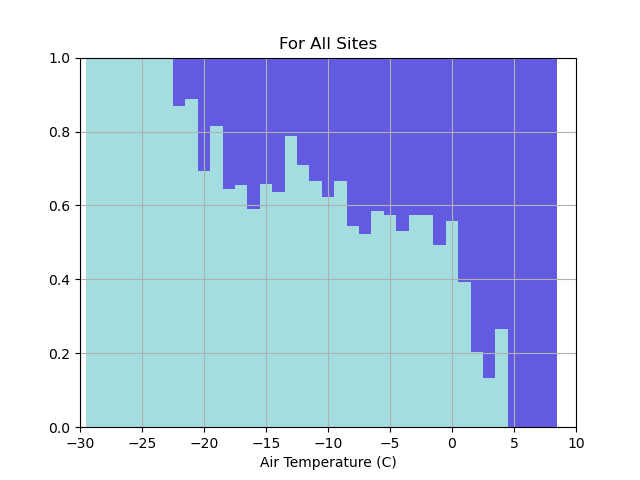

In [36]:
# stacked(snowstaydf.AirTC_Avg, snowunloaddf.AirTC_Avg, -15, 10, 1, "For All Data", nametemp)
stacked(all_stay.temp, all_unload.temp, -30, 10, 1, "For All Sites", nametemp)

In [73]:
sns.set_style('darkgrid')

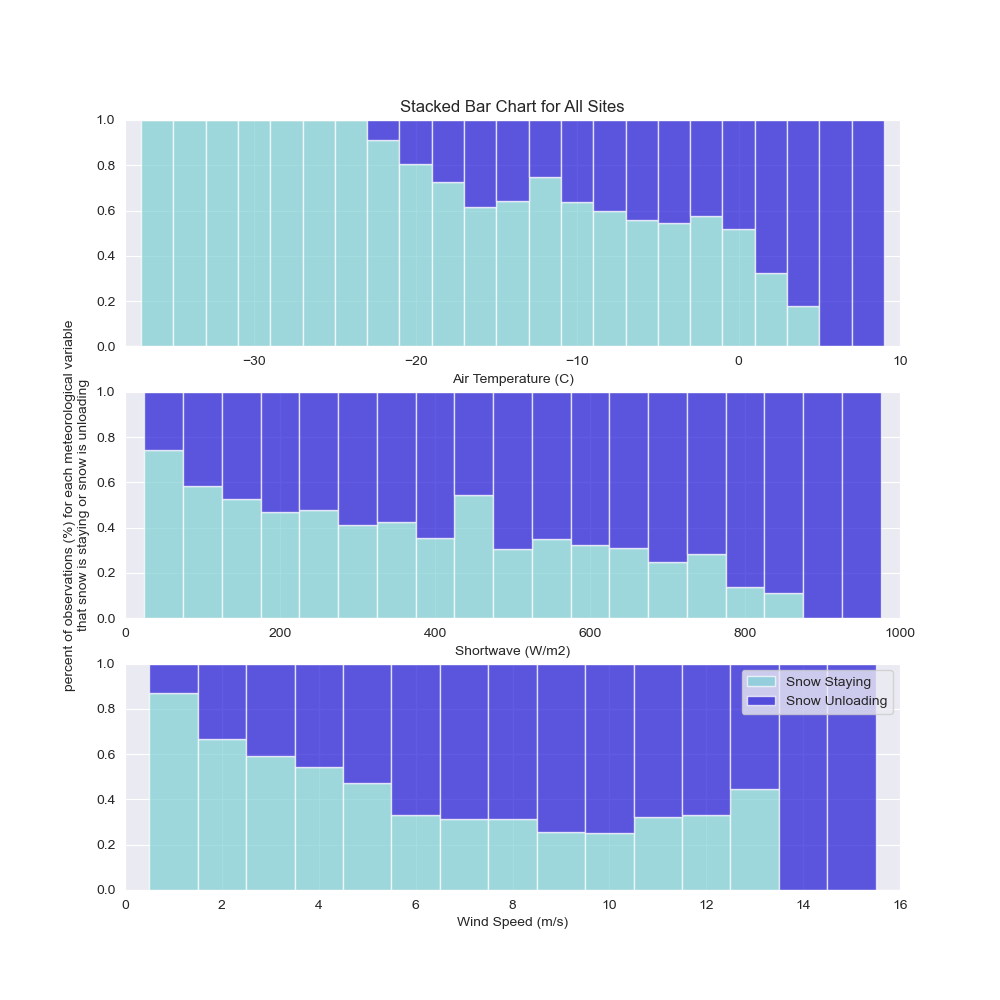

In [75]:
# define datasets 
a = all_stay.temp.copy(deep=True) # snow staying
b = all_unload.temp.copy(deep=True) # snow unloading 

c = all_stay.shortwave.copy(deep=True) # snow staying
d = all_unload.shortwave.copy(deep=True) # snow unloading 

e = all_stay.windspeed.copy(deep=True) # snow staying
f = all_unload.windspeed.copy(deep=True) # snow unloading 

temp_binwidth = 2
swrd_binwidth = 50
wind_binwidth = 1

# note that these give you bin edges, not bin centers
a_count, a_bin_edges = np.histogram(a, bins=range(int(-40), int(10), int(temp_binwidth))) # temp
b_count, b_bin_edges = np.histogram(b, bins=range(int(-40), int(10), int(temp_binwidth))) # temp

c_count, c_bin_edges = np.histogram(c, bins=range(int(0), int(1000), int(swrd_binwidth))) # sw
d_count, d_bin_edges = np.histogram(d, bins=range(int(0), int(1000), int(swrd_binwidth))) # sw

e_count, e_bin_edges = np.histogram(e, bins=range(int(0), int(20), int(wind_binwidth))) # wind
f_count, f_bin_edges = np.histogram(f, bins=range(int(0), int(20), int(wind_binwidth))) # wind
    
# to get bin centers, add 1/2 of the bin width (in this case 1/2 of 1 is 0.5) to the bin edges 
abhalf_range = temp_binwidth / 2
cdhalf_range = swrd_binwidth / 2
efhalf_range = wind_binwidth / 2

a_bin_centers = a_bin_edges[:-1] + abhalf_range # SINCE SW IN 100 w/m2 BINS
b_bin_centers = b_bin_edges[:-1] + abhalf_range

c_bin_centers = c_bin_edges[:-1] + cdhalf_range # SINCE SW IN 100 w/m2 BINS
d_bin_centers = d_bin_edges[:-1] + cdhalf_range

e_bin_centers = e_bin_edges[:-1] + efhalf_range # SINCE SW IN 100 w/m2 BINS
f_bin_centers = f_bin_edges[:-1] + efhalf_range

# calculate percent based on total (a and b) in each bin
a_percent = a_count / (a_count + b_count)
b_percent = b_count / (a_count + b_count)

c_percent = c_count / (c_count + d_count)
d_percent = d_count / (c_count + d_count)

e_percent = e_count / (e_count + f_count)
f_percent = f_count / (e_count + f_count)

# # convert those int to strings for printing on the plot 
# staycount   = a_count.astype('str')
# unloadcount = b_count.astype('str')

# remove nans where there was missing a or b data
a_percent[np.isnan(a_percent)] = 0
b_percent[np.isnan(b_percent)] = 0

c_percent[np.isnan(c_percent)] = 0
d_percent[np.isnan(d_percent)] = 0

e_percent[np.isnan(e_percent)] = 0
f_percent[np.isnan(f_percent)] = 0

# make the stacked bar plot
fig, axes = plt.subplots(3,1, figsize = (10,10), sharey=True, sharex=False)
bar1 = axes[0].bar(a_bin_edges[1:], a_percent, width=temp_binwidth, label=namesnow, color=colorsnow, alpha=.7)
bar2 = axes[0].bar(a_bin_edges[1:], b_percent, width=temp_binwidth, bottom=a_percent, label=namesnowunload, color=colorsnowunload, alpha=.7)

bar3 = axes[1].bar(c_bin_edges[1:], c_percent, width=swrd_binwidth, label=namesnow, color=colorsnow, alpha=.7)
bar4 = axes[1].bar(d_bin_edges[1:], d_percent, width=swrd_binwidth, bottom=c_percent, label=namesnowunload, color=colorsnowunload, alpha=.7)

bar5 = axes[2].bar(e_bin_edges[1:], e_percent, width=wind_binwidth, label=namesnow, color=colorsnow, alpha=.7)
bar6 = axes[2].bar(f_bin_edges[1:], f_percent, width=wind_binwidth, bottom=e_percent, label=namesnowunload, color=colorsnowunload, alpha=.7)

axes[0].set_xlim(-38, 10) # temp
axes[1].set_xlim(0, 1000) # sw
axes[2].set_xlim(0, 16) # wind

axes[0].set_title("Stacked Bar Chart for All Sites")
axes[0].set_xlabel(nametemp)
axes[1].set_xlabel(nameSW)
axes[2].set_xlabel(namewind)

axes[1].set_ylabel("percent of observations (%) for each meteorological variable\nthat snow is staying or snow is unloading")

# axes[0].grid()
plt.legend(loc='best')
        
plt.show()